In [319]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [320]:
"""
Extraction was done by Barry Becker from the 1994 Census database.  
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Prediction task is to determine whether a person's income is over $50,000 a year.
"""

"\nExtraction was done by Barry Becker from the 1994 Census database.  \nA set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))\nPrediction task is to determine whether a person's income is over $50,000 a year.\n"

### I) Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [321]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Garbage Collector
import gc 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Time Modules
import time
import datetime
from datetime import datetime, timedelta

import polars as pl
# Plots

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")
# Statistics 
from scipy.stats import norm
from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Quick-tour regarding the dataframe.

In [322]:
### Target
target = 'income'

In [323]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [324]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


* ### Which columns have missing values, and how much data is missing?

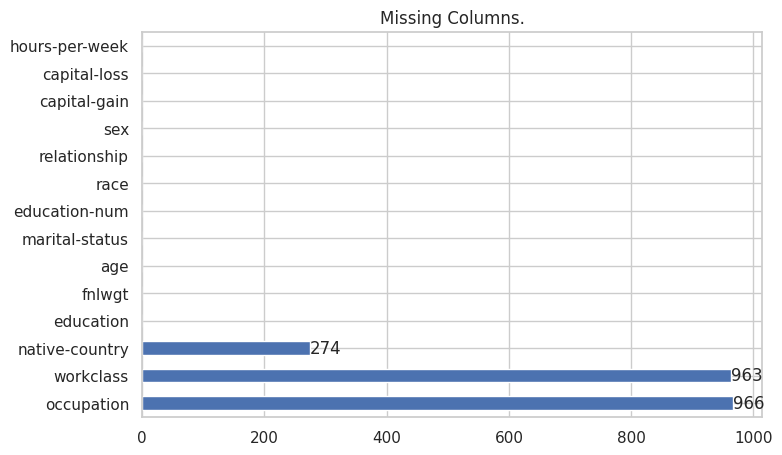

In [325]:
# Count missing values
missing_counts = X.isnull().sum().sort_values(ascending=False)

# ax-Plot
ax = missing_counts.plot(
    kind='barh', 
    figsize=(8, 5), 
    title="Missing Columns.", 
    grid=True, 

)

# Annotate each bar with its value
for index, value in enumerate(missing_counts):
    if value == 0:
        break
    else:
        ax.annotate(str(round(value, 3)), xy=(value, index), va='center')

# Show plot
plt.show()

In [326]:
categorical = list(X.select_dtypes(include=['object', 'category']).columns)
numerical = list(X.select_dtypes(include=['int64', 'float64']).columns)
print(numerical, categorical)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [327]:
color_features = list(sns.color_palette("hls", len(categorical)+len(numerical)))
object_color = color_features[:len(categorical)]
numerical_color = color_features[len(categorical):]

### 1) What is the distribution of age among individuals?

#### Histogram for categorical values.

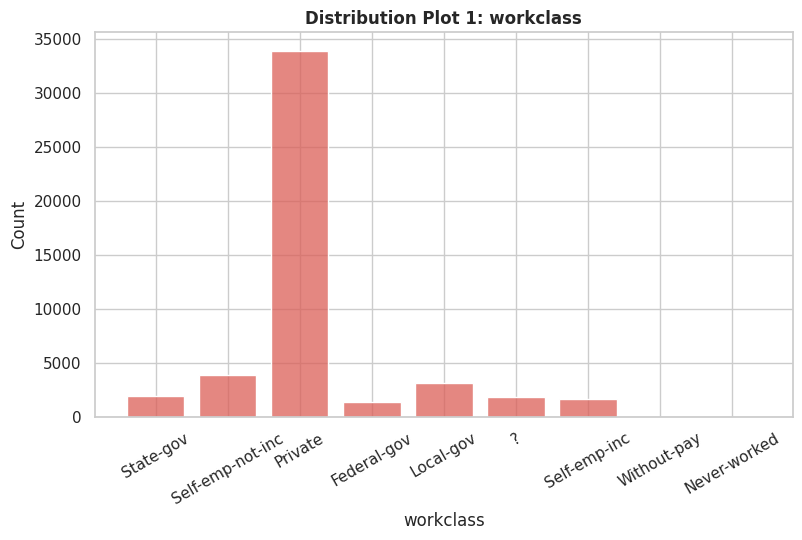

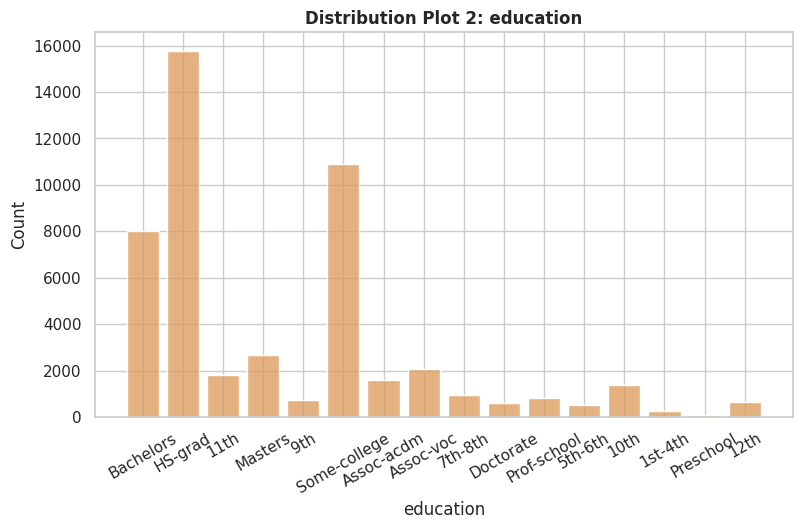

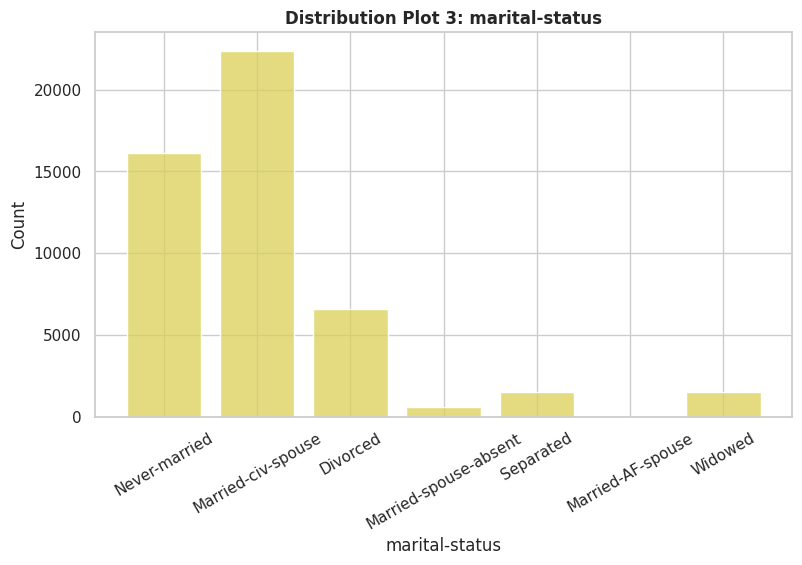

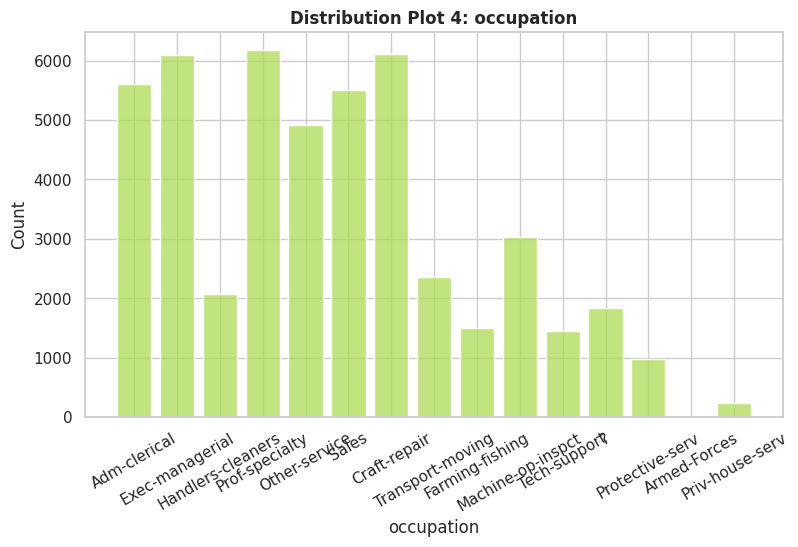

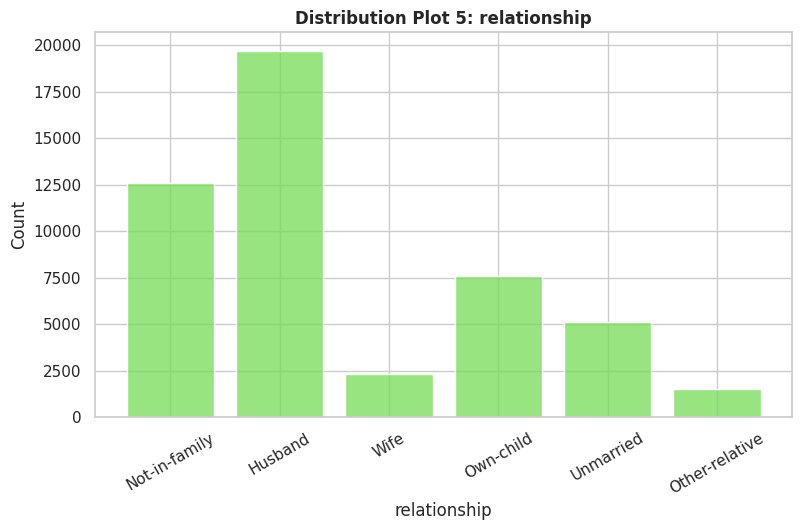

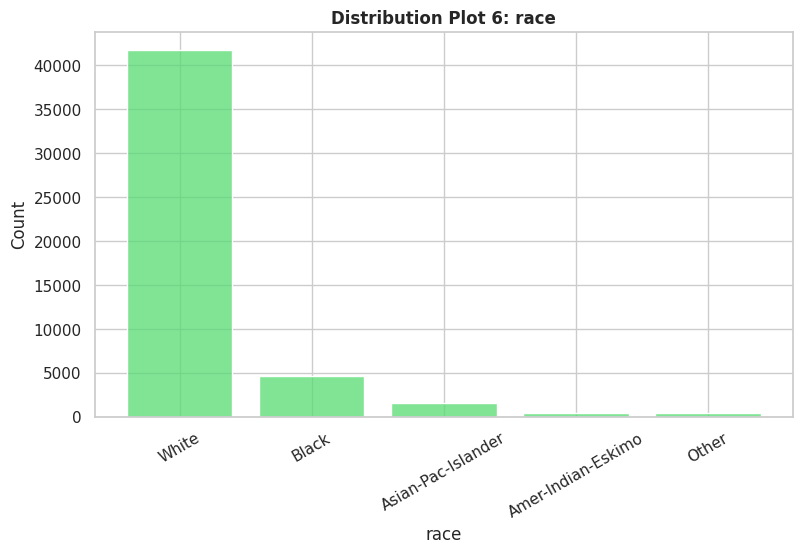

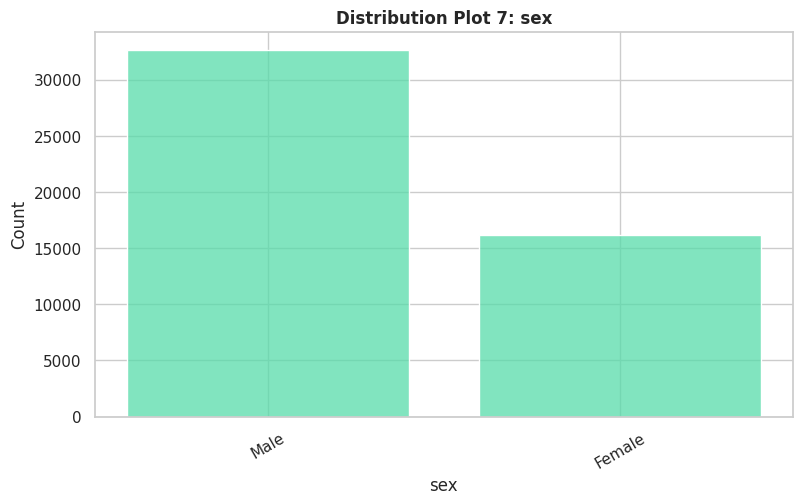

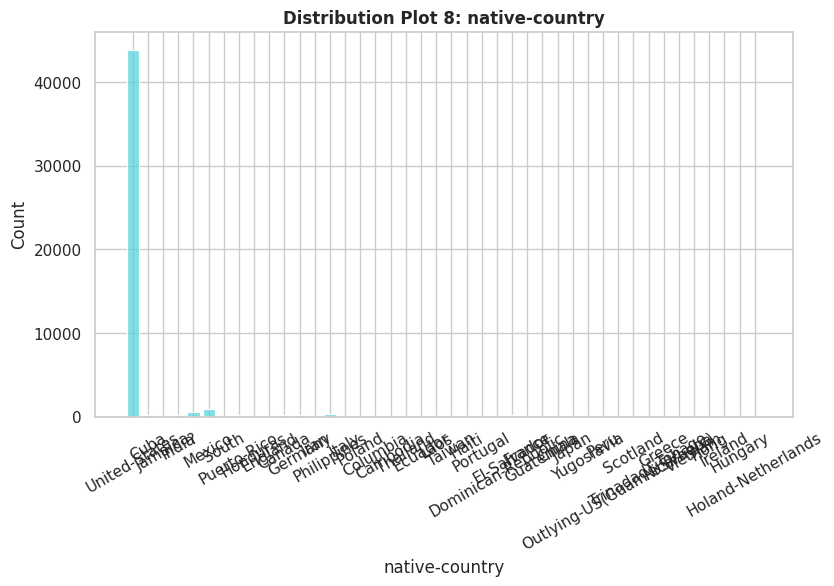

In [328]:
for i, (x_col, color) in enumerate(zip(categorical, object_color), start=1):
    ax = plt.figure(figsize=(9,5))
    ax = sns.histplot(data=X, x=x_col, color=color, fill=True, stat='count', element='bars', shrink=0.8, discrete = True)
    ax.tick_params(axis='x', rotation=30)

    plt.title(f"Distribution Plot {i}: {x_col}", fontweight='bold')

    plt.show()

## Density and Outliers detection.

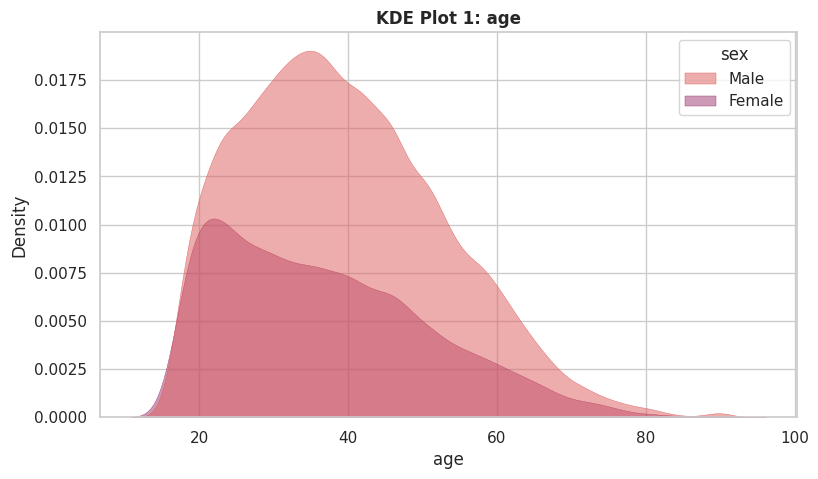

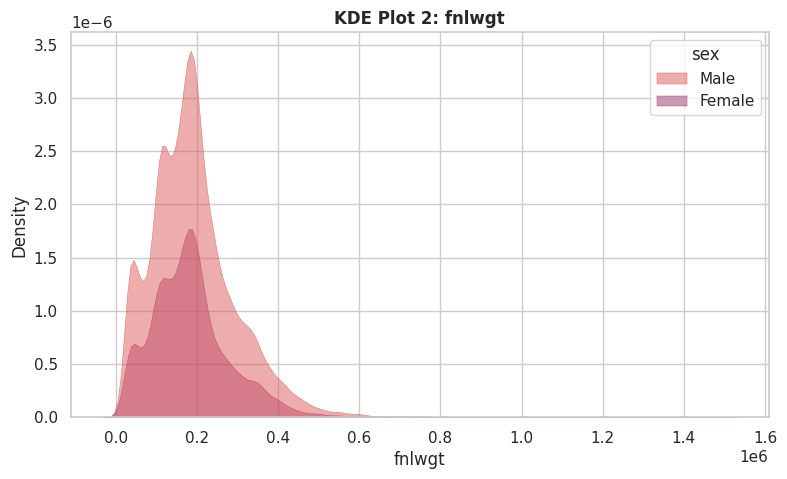

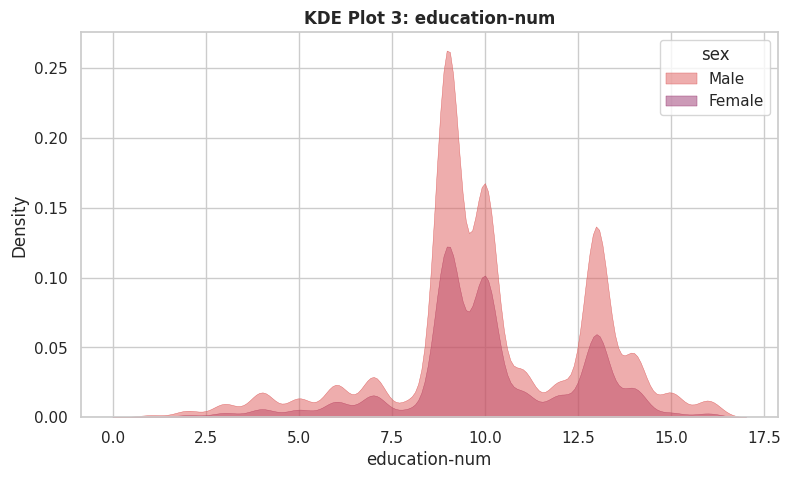

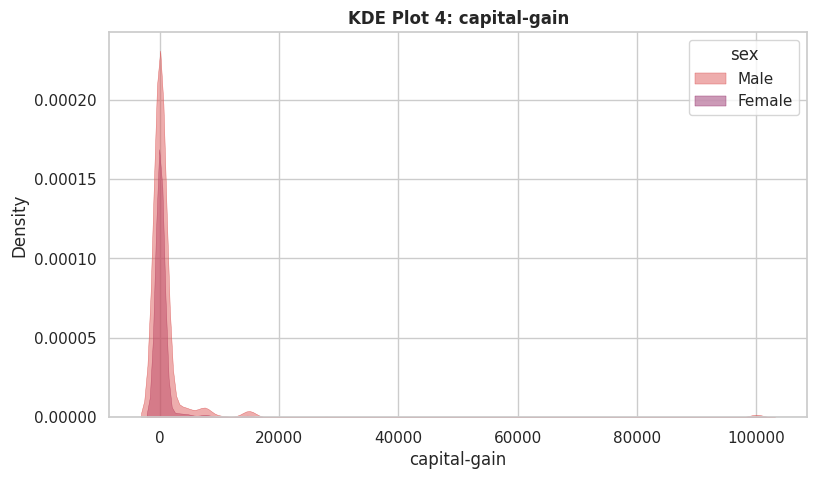

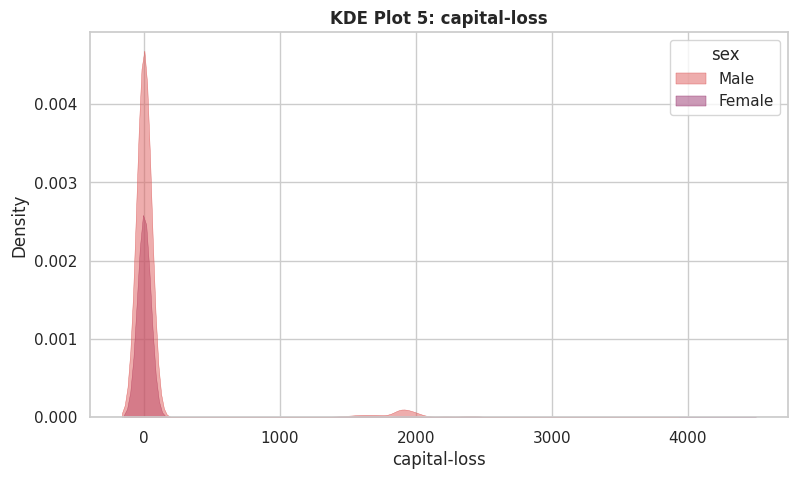

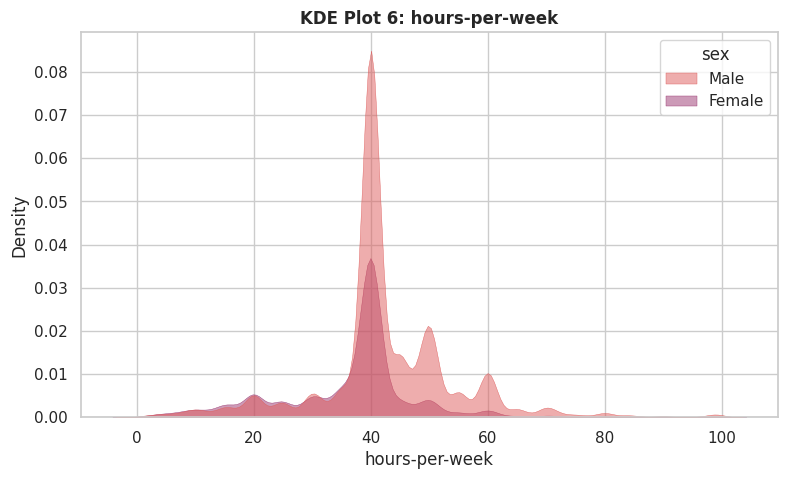

In [329]:
for i, (x_col, color) in enumerate(zip(numerical, numerical_color), start=1):
    ax = plt.figure(figsize=(9,5))
    ax = sns.kdeplot(data=X, x=x_col, color=color, palette='flare',fill=True, hue='sex', alpha=.5, linewidth=0.3)
    plt.title(f"KDE Plot {i}: {x_col}", fontweight='bold')

    plt.show()

## 2) What is the gender distribution in the dataset?

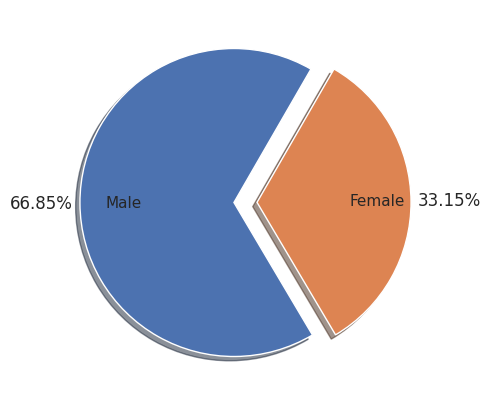

In [330]:
fig, ax = plt.subplots(figsize=(5, 5))
pie_plot = X['sex'].value_counts(ascending=False)

ax.pie(pie_plot, autopct='%.2f%%',
       pctdistance=1.25, 
       labeldistance=.6, 
       explode=[0.0, 0.15],
       labels=['Male', 'Female'], 
       shadow=True,
       startangle=60)

plt.show()

In [331]:
print('Female AVG Age:', X.groupby(['sex'])['age'].mean()[0])
print('Male AVG Age:', X.groupby(['sex'])['age'].mean()[1])

Female AVG Age: 36.92798913043478
Male AVG Age: 39.49439509954058


## 3) What are the most common education levels?

In [332]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


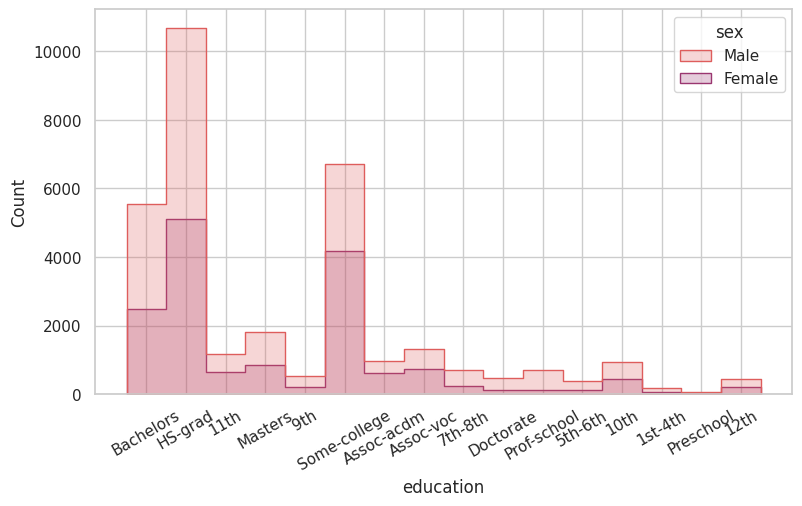

In [333]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.histplot(X, x="education", hue="sex", element="step", stat='count', palette='flare')
ax.tick_params(axis='x', rotation=30)

## 4) How is the relationship between age and hours-per-week?

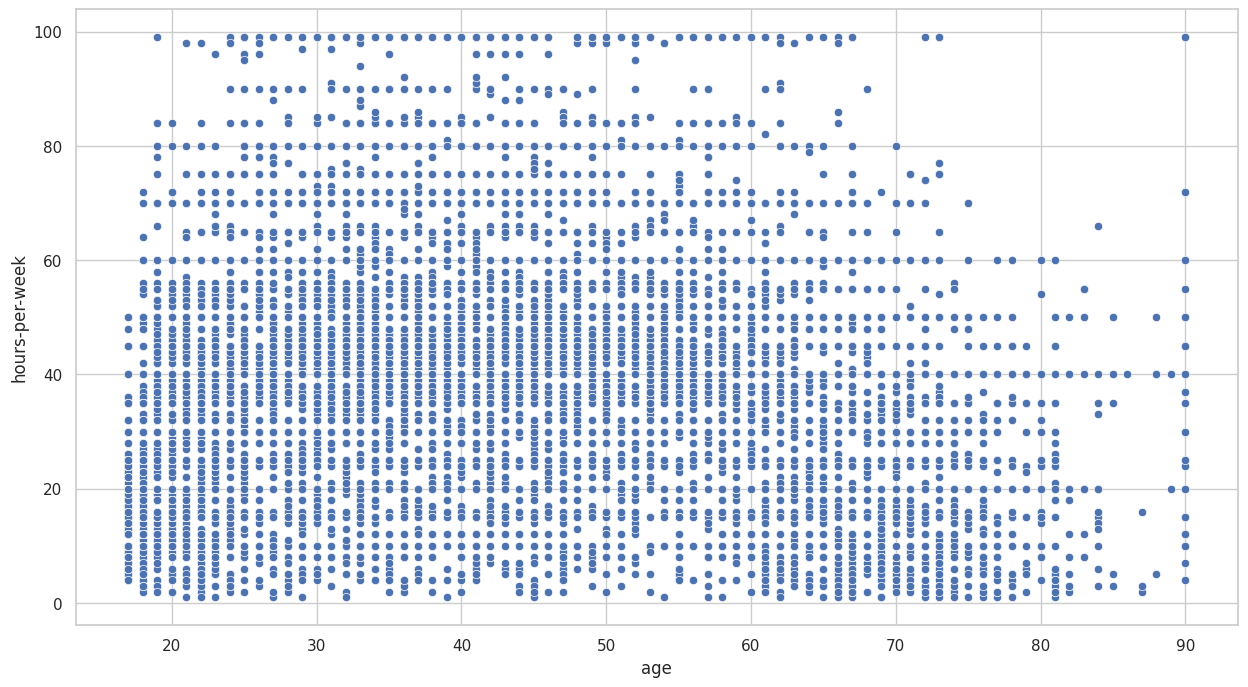

In [334]:
sns.scatterplot(data=X, y="hours-per-week", 
                x="age", 
                palette='flare');

## 5) Which work classes are most represented, and how do they vary by gender?

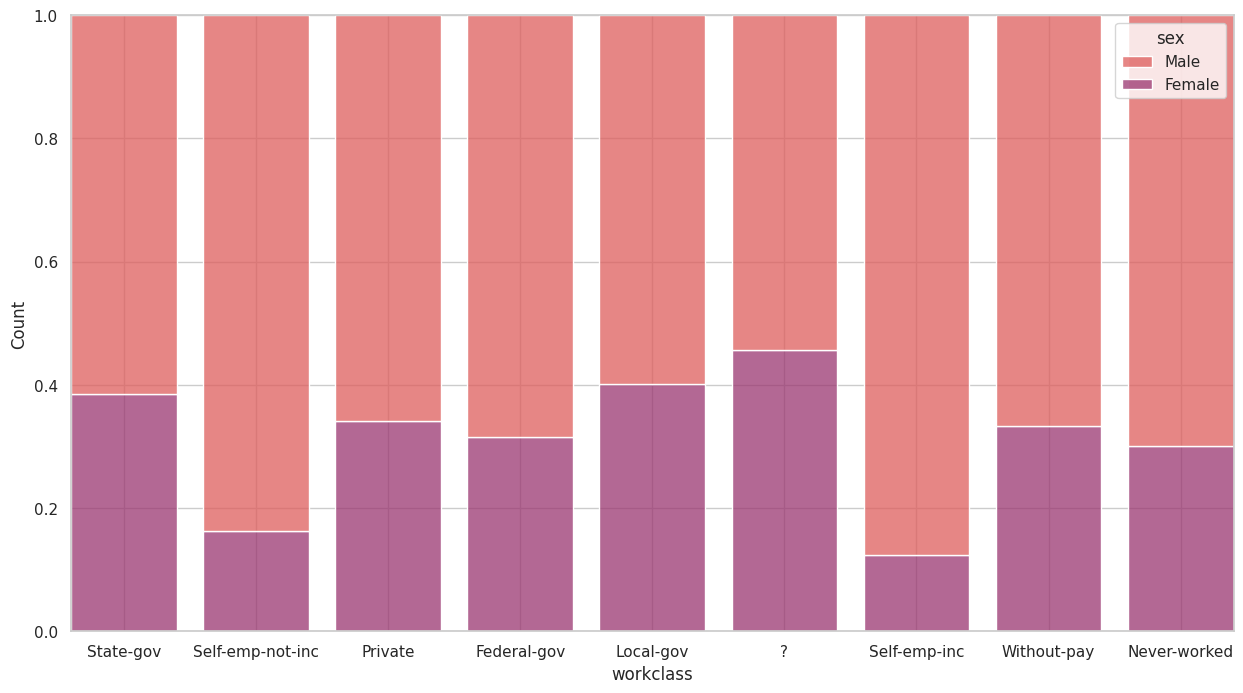

In [335]:
sns.histplot(data=X, 
             x="workclass",  
             hue="sex", 
            palette='flare', 
             multiple = 'fill', 
             shrink = 0.8, 
             discrete = True,
             legend = True,);

## 6) What is the proportion of individuals earning more than $50K?

<Axes: ylabel='count'>

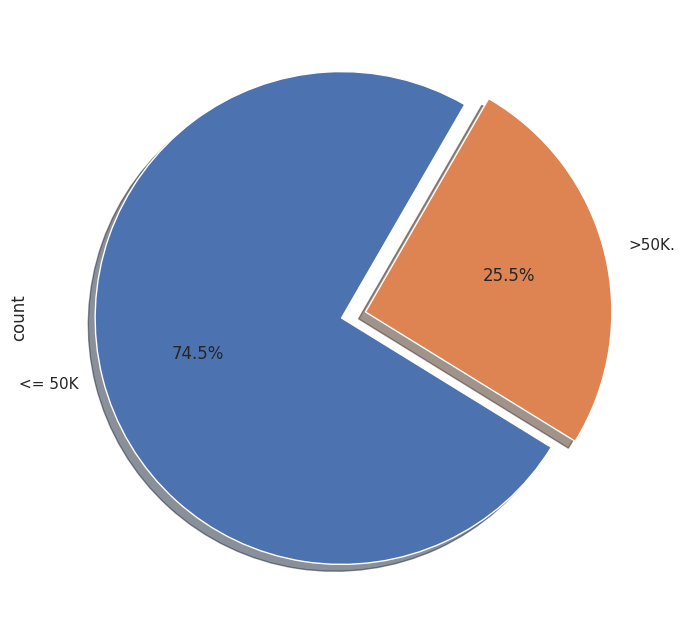

In [336]:
# <= 50K, >50K
y.replace({'<=50K.':0,
           '<= 50K':0,
           '<=50K':1,
           '>50K.':1,
           '>50K':1
          }, inplace=True)

X['income'] = y

counts = X['income'].value_counts(ascending=False)
counts.plot(kind = 'pie', autopct = '%1.1f%%',
                        labels = ['<= 50K', '>50K.'],
                        shadow = True,
                        explode = (0, 0.1),
                        startangle = 60)

## 7) Is there a relationship between education level and income?

Text(0.5, 1.0, 'Education based on Income')

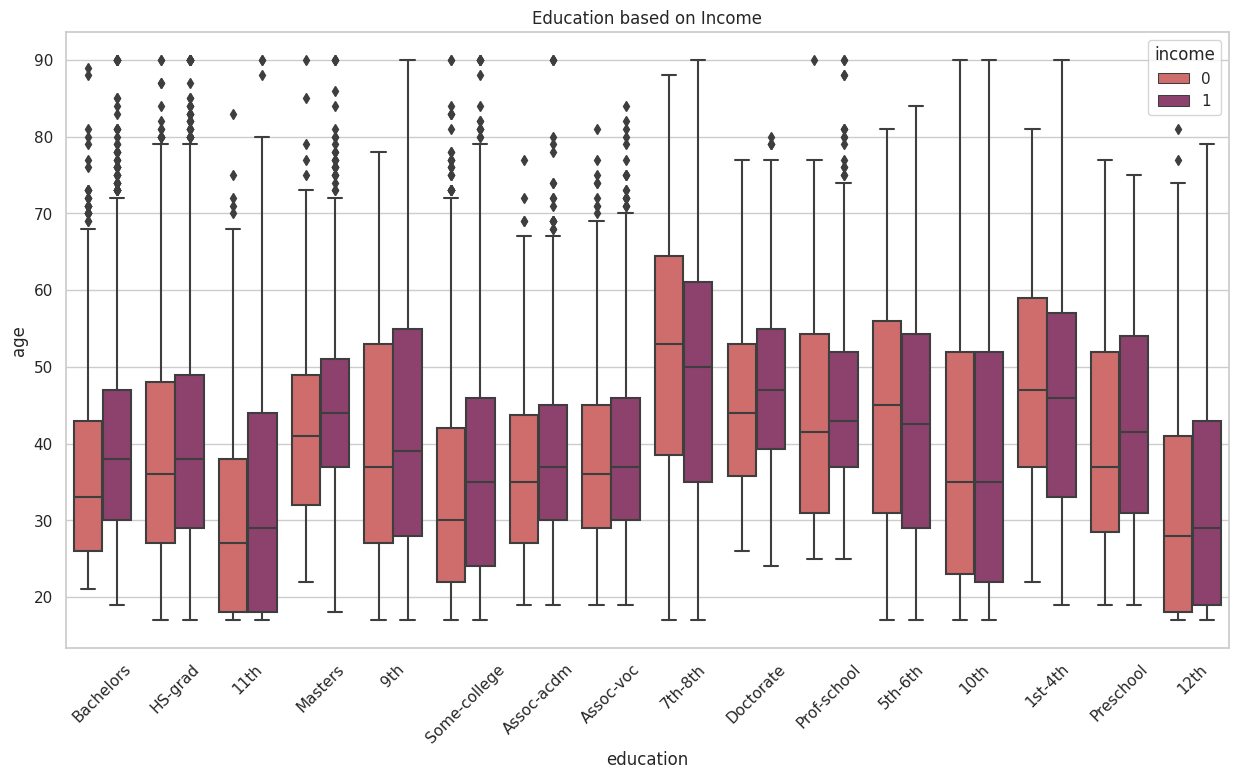

In [337]:
ax = sns.boxplot(data=X, x="education", 
                 y="age", 
                 palette='flare', 
                 hue="income");
ax.tick_params(axis='x', rotation=45)
plt.title("Education based on Income")

## 8) Does marital-status affect the income?

In [338]:
X[X['income']=='>50K'].head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


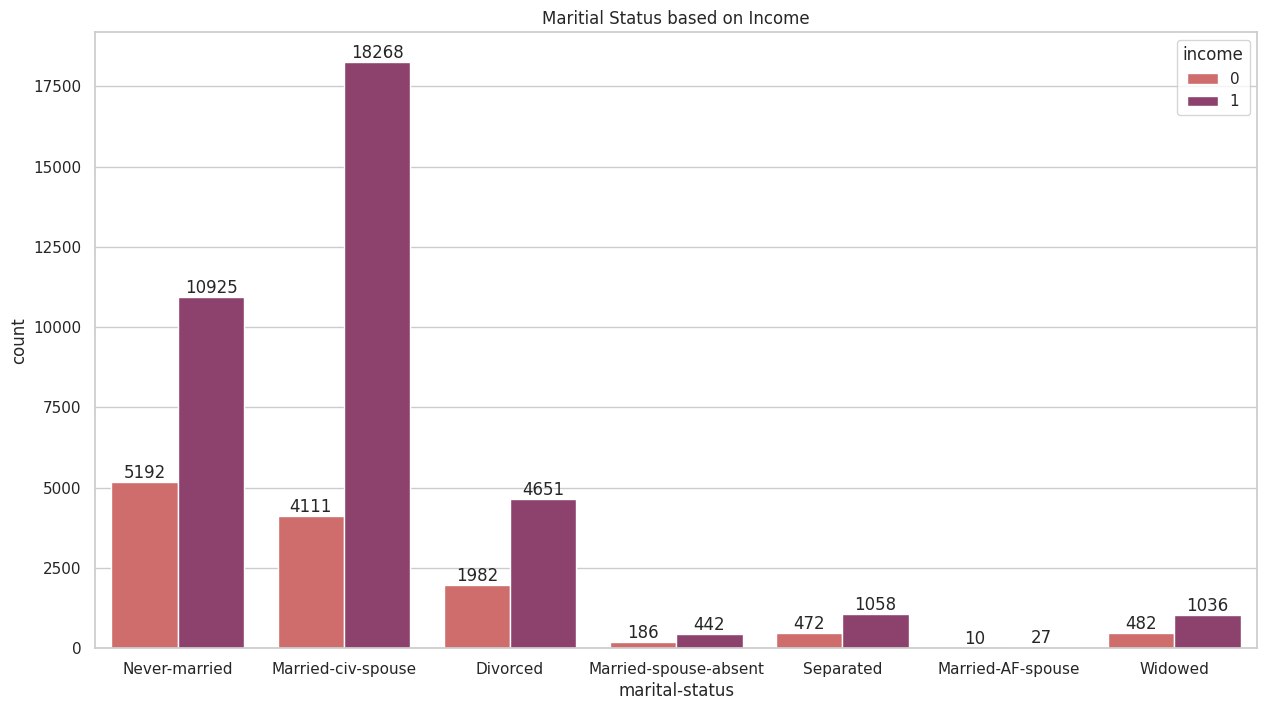

In [339]:
ax = sns.countplot(X, x='marital-status', hue='income', palette='flare')
for bar in ax.containers:  
    ax.bar_label(bar, label_type='edge') 


plt.title("Maritial Status based on Income")
plt.show()


## 9) What is the relationship between hours worked per week and income?

In [340]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


There are 96 unique values into the hours-per-week columns, would be easier to group them and create a study it by range of values.

In [341]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Bin edges
labels= ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90', '90-100']  

# Create a new column with bins
X['bins-hours'] = pd.cut(X['hours-per-week'], bins=bins, labels=labels, right=False).astype('object')

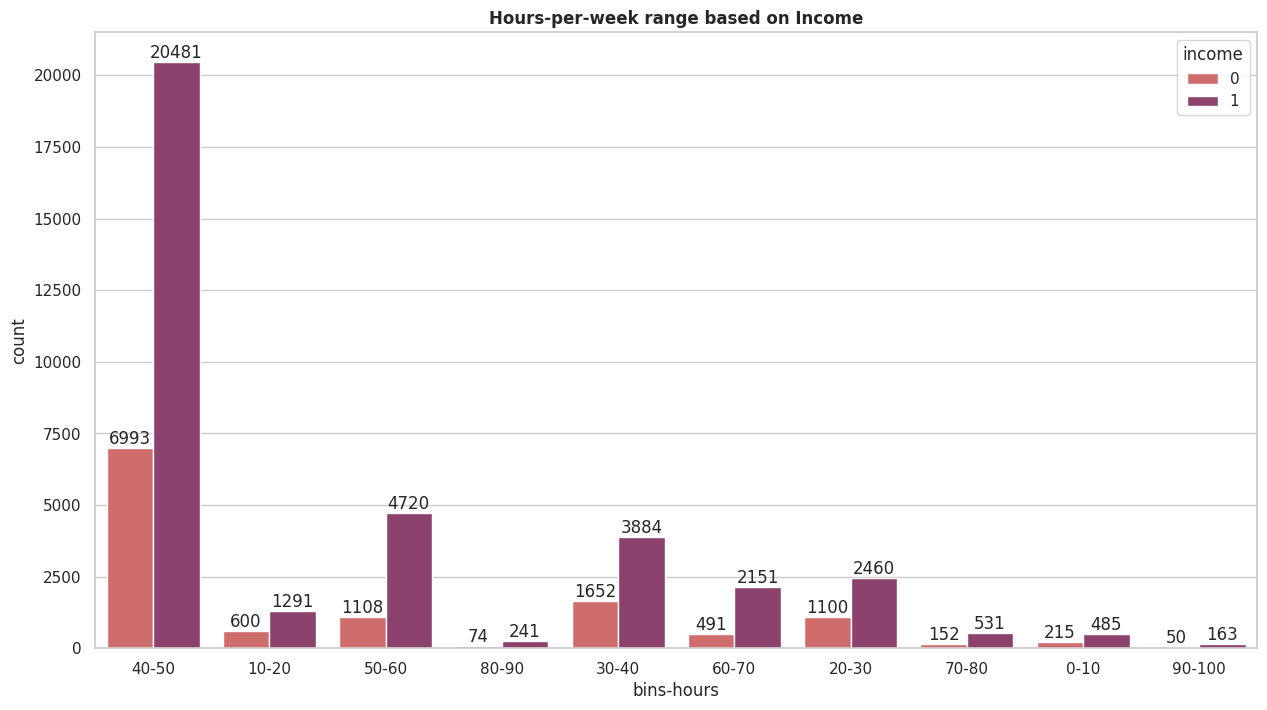

In [342]:
ax = sns.countplot(X, x='bins-hours', hue='income', palette='flare');
for bar in ax.containers:  
    ax.bar_label(bar, label_type='edge') 
    

plt.title("Hours-per-week range based on Income", fontweight='bold')
plt.show()

## 10) Which occupation types are most associated with earning more than $50K?

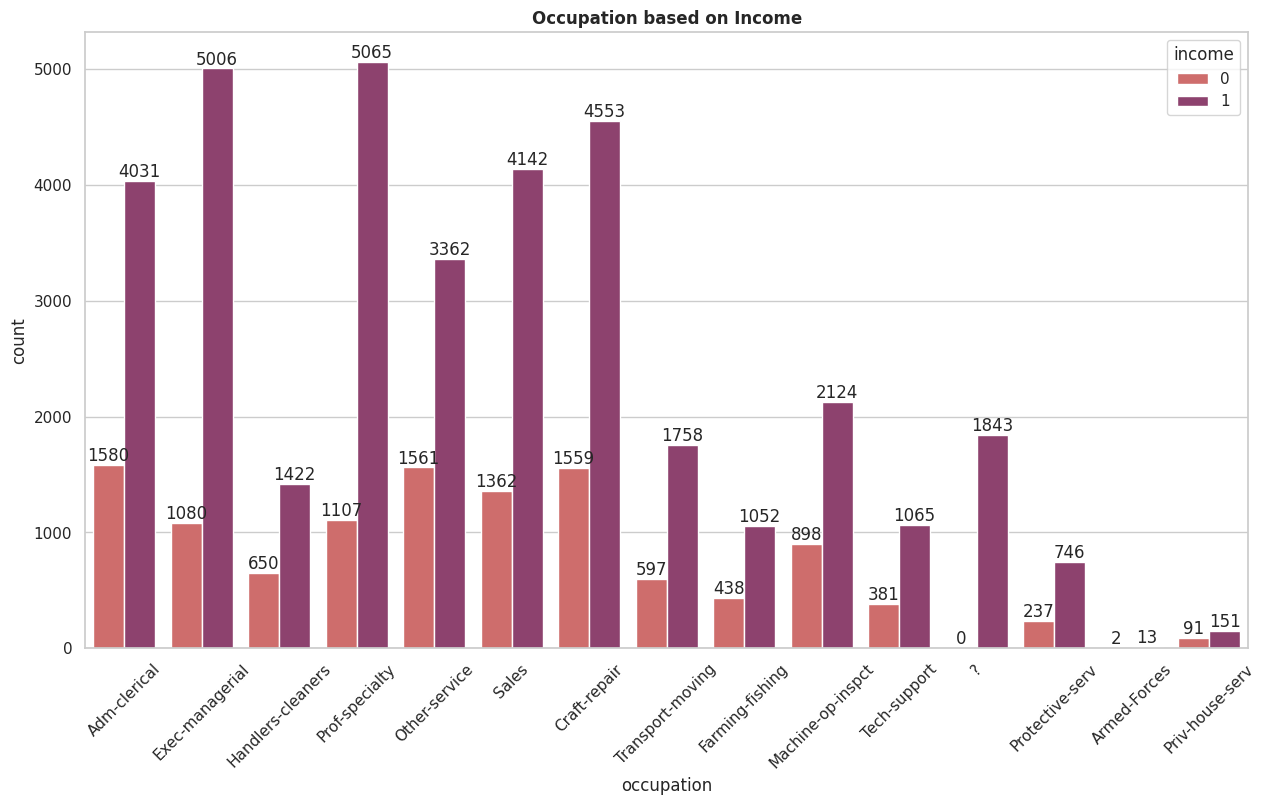

In [343]:
ax = sns.countplot(X, x='occupation', hue='income', palette='flare');
for bar in ax.containers:  
    ax.bar_label(bar, label_type='edge') 
    

plt.title("Occupation based on Income", fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

## 11) Which countries have the highest percentage of individuals earning more than $50K?

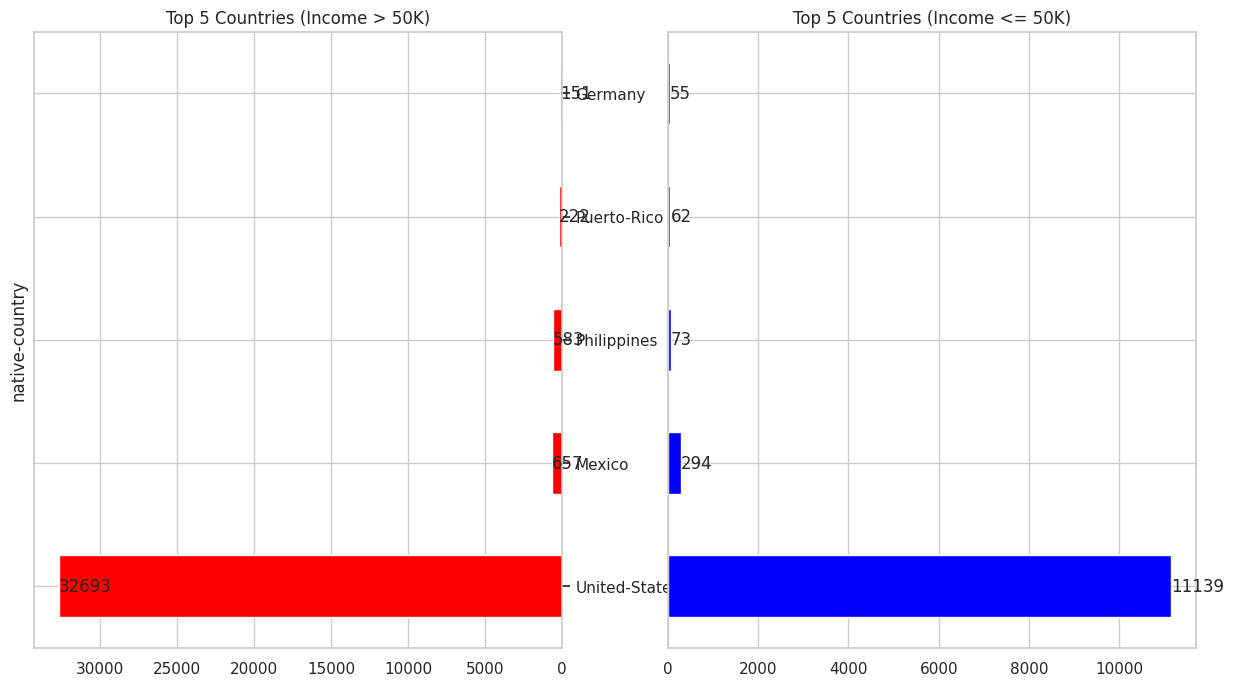

In [344]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

# Plot the first graph and set its title
data1 = X[X['income'] == 1].value_counts('native-country', ascending=False)[:5]
data1.plot(kind='barh', x='LABEL', color='red', legend=False, ax=ax)
ax.set_title('Top 5 Countries (Income > 50K)')

# Add annotations for the first graph
for i, value in enumerate(data1):
    ax.text(value, i, str(value), va='center', ha='left')

# Plot the second graph and set its title
data2 = X[X['income'] != 1].value_counts('native-country', ascending=False)[:5]
data2.plot(kind='barh', x='LABEL', color='blue', ax=ax2)
ax2.set_title('Top 5 Countries (Income <= 50K)')

# Add annotations for the second graph
for i, value in enumerate(data2):
    ax2.text(value, i, str(value), va='center', ha='left')

# Show the plot
plt.show()

## 12) Are there any differences in income levels between different races?

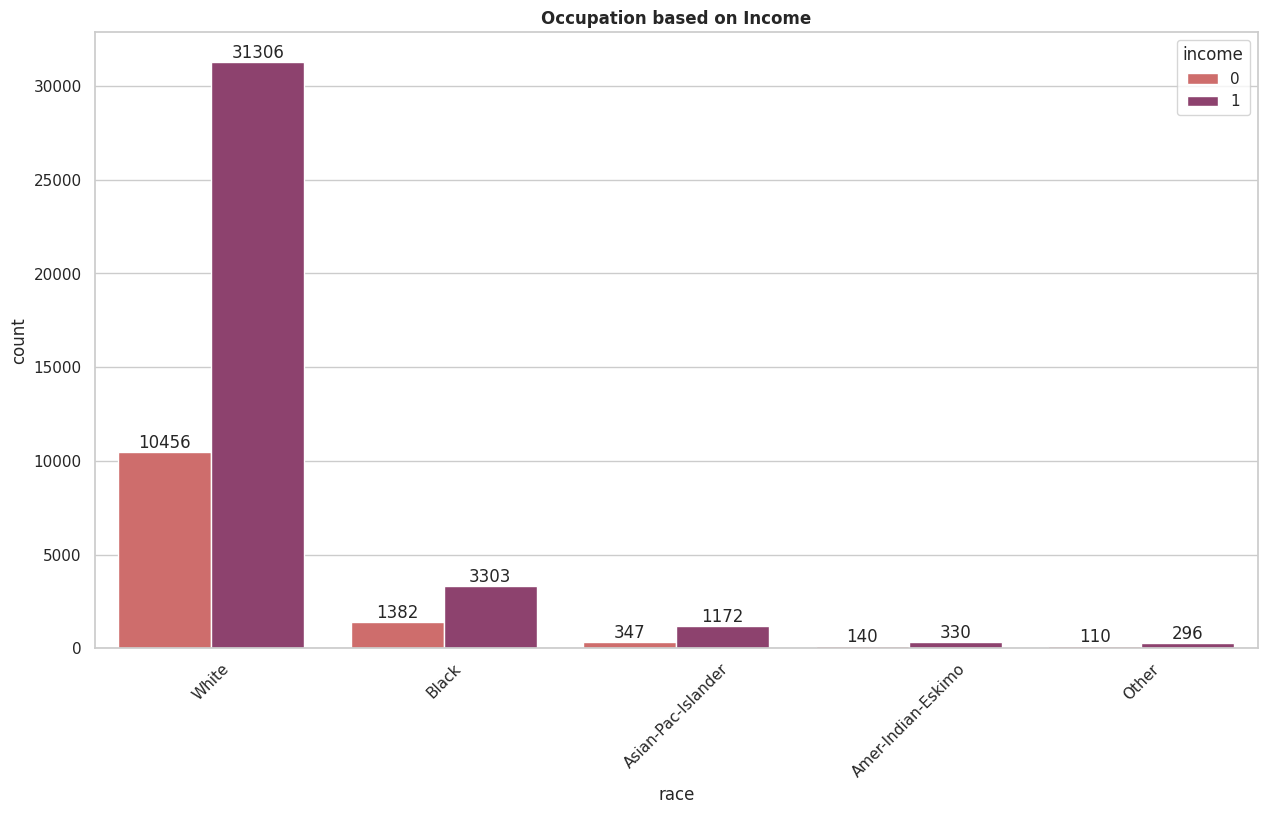

In [345]:
ax = sns.countplot(X, x='race', hue='income', palette='flare');
for bar in ax.containers:  
    ax.bar_label(bar, label_type='edge') 
    

plt.title("Occupation based on Income", fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [346]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_tree

In [347]:
X = X.drop(['income', 'bins-hours', 'education'], axis=1)
X = pd.get_dummies(X)

## 13) Modeling with XGBClassifier.

In [348]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 92 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        48842 non-null  int64
 1   fnlwgt                                     48842 non-null  int64
 2   education-num                              48842 non-null  int64
 3   capital-gain                               48842 non-null  int64
 4   capital-loss                               48842 non-null  int64
 5   hours-per-week                             48842 non-null  int64
 6   workclass_?                                48842 non-null  bool 
 7   workclass_Federal-gov                      48842 non-null  bool 
 8   workclass_Local-gov                        48842 non-null  bool 
 9   workclass_Never-worked                     48842 non-null  bool 
 10  workclass_Private                          488

In [349]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

In [350]:
print('X_train :', X_train.shape)
print('X_valid :', X_valid.shape)
print('y_train :', y_train.shape)
print('y_valid :', y_valid.shape)

X_train : (34189, 92)
X_valid : (14653, 92)
y_train : (34189, 1)
y_valid : (14653, 1)


In [351]:
params = {'n_estimators':500,
                        'learning_rate':0.01,
                        'use_label_encoder':False,
                        'eval_metric':"logloss",
                        'n_jobs':-1,
                        'booster':'gbtree'}

model = XGBClassifier(**params)

model.fit(X_train, y_train)

preds = model.predict(X_valid)

score = classification_report(y_valid, preds)

print('Classification Report:', score, sep='\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.07      0.12      3729
           1       0.76      1.00      0.86     10924

    accuracy                           0.76     14653
   macro avg       0.82      0.53      0.49     14653
weighted avg       0.79      0.76      0.67     14653



## 14) XGBClassifier Cross Validation with StratifiedKFold on 10 splits.

In [352]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
scores = cross_val_score(model, X_train, y_train,
                              cv = StratifiedKFold(n_splits=10),
                              scoring = 'accuracy')

print(f"AVG Accuracy score: {np.mean(scores):.2f} + {np.std(scores):.4f}")

AVG Accuracy score: 0.76 + 0.0022


## 15) XGBClassifier with ConfusionMatrixDisplay plot.

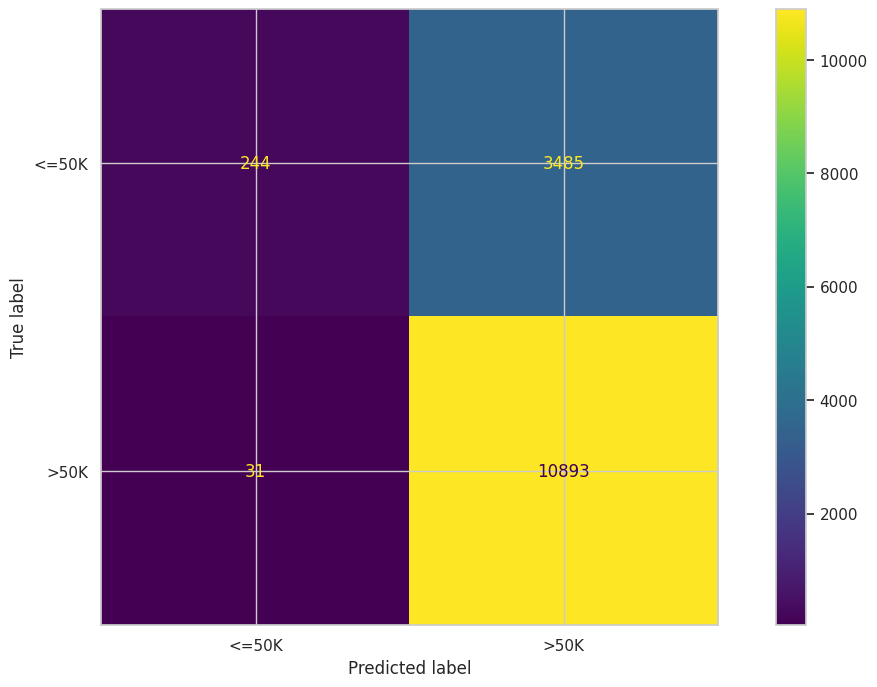

In [353]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_valid, preds),
                              display_labels = ['<=50K', '>50K'])

disp.plot()
plt.show()